In [19]:
using JSON

function mdf(ne, connect, cc)
    #print(ne)
    A = zeros(ne, ne)
    b = zeros(ne, 1)

    if (connect[1,1] == 1)
        aux = -2
    else 
        aux = -4
    end

    bloco = [1, 1, 1, 1]
    for e=1:ne
        if (cc[e, 1] == 0)
            A[e, e] = aux
            
            for j=2:(connect[e, 1] + 1)
                A[e, connect[e, j]] = bloco[j-1]
            end
        else
            A[e,e] = 1
            b[e, 1] = cc[e, 2]
        end
    end

    x = A \ b

    return x
end

function readJSON(_file::String)
    println(".read")
    open(_file,"r") do f
        data = JSON.parse(f)
        if  haskey(data, "connection_map") & haskey(data, "cc")

            ne = size(data["connection_map"])[1]

            connect = zeros(Int64, ne, 5)
            cc = zeros(Float64, ne, 2)

            for i=1:ne
                for j=1:5
                    connect[i,j] = convert(Int64, data["connection_map"][i][j])
                end

                for k=1:2
                    cc[i, k] = convert(Float64, data["cc"][i][k] )
                end

            end
        end
        return ne, connect, cc
    end
end

ne, connect, cc = readJSON("mdf.json")
y = mdf(ne, connect, cc)

.read

25×1 Matrix{Float64}:
   0.0
  75.0
  75.0
  75.0
  75.0
   0.0
  42.85714285714286
  63.16964285714286
  78.57142857142858
 100.0
   ⋮
  33.92857142857143
  52.455357142857146
  69.64285714285715
 100.0
   0.0
  50.0
  50.0
  50.0
  50.0

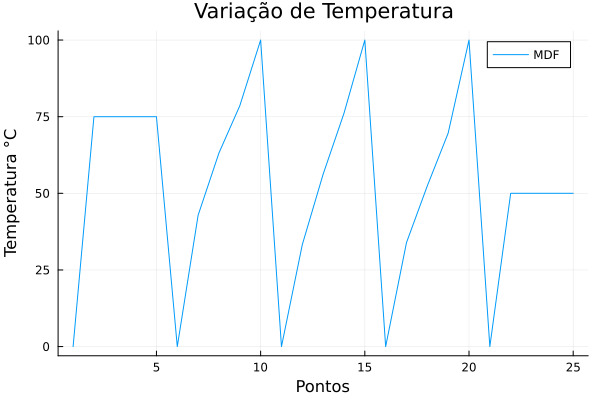

In [20]:
using Plots
#l = size(x)[1]
#x = sort(x[1:l])
x = 1:size(y)[1]
plot(x, y, label="MDF")
title!("Variação de Temperatura")
ylabel!("Temperatura °C")
xlabel!("Pontos")